In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
#to plot within notebook
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
##%matplotlib inline
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import recall_score, precision_score
from mlxtend.plotting import plot_decision_regions

In [2]:
#Read data
stocks = pd.read_csv("C:\\Users\\SONY\\Desktop\\INTERNSHIP PROJECT 2\\nse_data.csv")
stocks.head()

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
0,20MICRONS,EQ,37.80,37.80,36.15,36.85,37.40,37.05,27130,994657.90,2017-06-28,202,INE144J01027
1,3IINFOTECH,EQ,4.10,4.85,4.00,4.55,4.65,4.05,20157058,92148517.65,2017-06-28,7353,INE748C01020
2,3MINDIA,EQ,13425.15,13469.55,12920.00,13266.70,13300.00,13460.55,2290,30304923.35,2017-06-28,748,INE470A01017
3,63MOONS,EQ,61.00,61.90,60.35,61.00,61.10,60.65,27701,1689421.00,2017-06-28,437,INE111B01023
4,8KMILES,EQ,546.10,548.00,535.00,537.45,535.20,547.45,79722,43208620.05,2017-06-28,1866,INE650K01021


In [3]:
stocks['HL_PCT'] = (stocks['HIGH'] - stocks['LOW']) / stocks['LOW'] * 100.0
stocks = stocks[['OPEN', 'HL_PCT', 'CLOSE', 'TOTTRDQTY', 'TIMESTAMP', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]

In [8]:
#Time Series Analysis
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)
start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)
stocks['TIMESTAMP'] = pd.to_datetime(stocks.TIMESTAMP,format='%Y-%m-%d')
stocks.index = stocks['TIMESTAMP']

In [9]:
stocks.head()

,OPEN,HL_PCT,CLOSE,TOTTRDQTY,TIMESTAMP,PREVCLOSE,TOTTRDVAL,TOTALTRADES,Date
TIMESTAMP,,,,,,,,,
2017-06-28,37.80,4.564315,36.85,27130,2017-06-28,37.05,994657.90,202,2017-06-28
2017-06-28,4.10,21.250000,4.55,20157058,2017-06-28,4.05,92148517.65,7353,2017-06-28
2017-06-28,13425.15,4.253483,13266.70,2290,2017-06-28,13460.55,30304923.35,748,2017-06-28
2017-06-28,61.00,2.568351,61.00,27701,2017-06-28,60.65,1689421.00,437,2017-06-28
2017-06-28,546.10,2.429907,537.45,79722,2017-06-28,547.45,43208620.05,1866,2017-06-28


In [10]:
train = []
test = []
for index, rows in stocks.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))
train = pd.DataFrame(train, columns = stocks.columns)
test = pd.DataFrame(test, columns = stocks.columns)

In [17]:
stocks.columns

Index(['OPEN', 'HL_PCT', 'CLOSE', 'TOTTRDQTY', 'TIMESTAMP', 'PREVCLOSE',
       'TOTTRDVAL', 'TOTALTRADES', 'Date'],
      dtype='object')

In [18]:
train.head()

,OPEN,HL_PCT,CLOSE,TOTTRDQTY,TIMESTAMP,PREVCLOSE,TOTTRDVAL,TOTALTRADES,Date
0,33.90,8.527132,33.0,48174,2016-04-21,33.75,1593805.60,253,2016-04-21
1,4.40,3.488372,4.3,684070,2016-04-21,4.35,2991352.25,360,2016-04-21
2,13939.70,6.574602,13424.1,1464,2016-04-21,14080.50,20233135.70,722,2016-04-21
3,2018.95,3.726613,1973.4,28967,2016-04-21,2000.85,57987253.05,3264,2016-04-21
4,26.40,3.875969,25.9,91366,2016-04-21,26.30,2388936.45,576,2016-04-21


In [19]:
test.head()

,OPEN,HL_PCT,CLOSE,TOTTRDQTY,TIMESTAMP,PREVCLOSE,TOTTRDVAL,TOTALTRADES,Date
0,37.80,4.564315,36.85,27130,2017-06-28,37.05,994657.90,202,2017-06-28
1,4.10,21.250000,4.55,20157058,2017-06-28,4.05,92148517.65,7353,2017-06-28
2,13425.15,4.253483,13266.70,2290,2017-06-28,13460.55,30304923.35,748,2017-06-28
3,61.00,2.568351,61.00,27701,2017-06-28,60.65,1689421.00,437,2017-06-28
4,546.10,2.429907,537.45,79722,2017-06-28,547.45,43208620.05,1866,2017-06-28


In [21]:
#Pre-Processing the Train Data 
X_train = train[['HL_PCT', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')
#Pre-Processing Test data
X_test = test[['HL_PCT', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [22]:
#Classifier
from sklearn.linear_model import TheilSenRegressor
clf = TheilSenRegressor()
clf.fit(X, Y) 
print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))
predict = clf.predict(x)
test['predict'] = predict

Accuracy of this Statistical Arbitrage model is:  0.9993851155823651


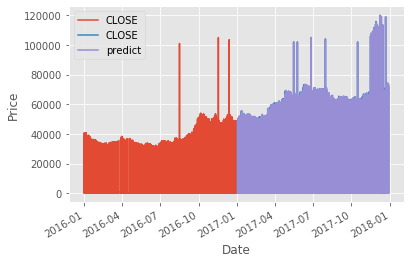

In [23]:
#Ploting 
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot()
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()